In [105]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10,10,1000)

In [106]:
v0,r,c,w,w0,T,t,k,l=symbols('V_0,R,C,\omega, omega_0, T,t,k,l')

In [107]:
H = 1/(r*c*w*I+1)
H

1/(I*C*R*\omega + 1)

上面的$H(j\omega)$被称为转移函数，反映了滤波器对频率的选择性，和电磁学力的复阻抗是一样的。

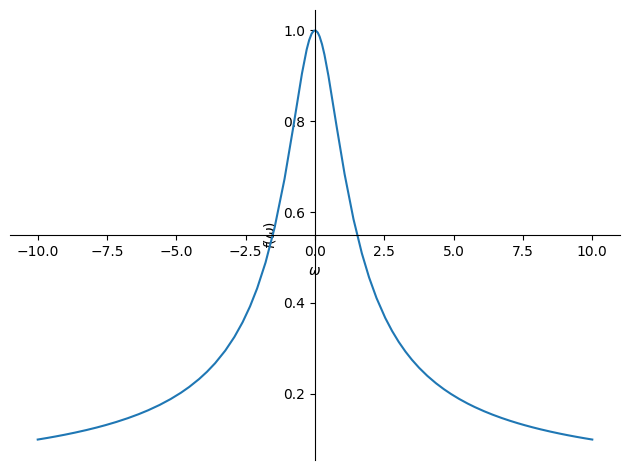

In [108]:
para={r:1,c:1}
plot(Abs(H).subs(para))

下面显示的是输入信号 $V_0|\cos (\omega t)|$ 的Fourier 变换式，$F(\omega)$。

In [109]:
T=2*pi/w0
T

2*pi/omega_0

In [110]:
s = cos(k*(w+w0)*T)
s

cos(2*pi*k*(\omega + omega_0)/omega_0)

In [111]:
ss = 1+2*summation(s,(k,1,l))
ss

2*Sum(cos(2*pi*k*(\omega + omega_0)/omega_0), (k, 1, l)) + 1

In [112]:
ff=sinc((w+w0)*T/4)*ss
ff

(2*Sum(cos(2*pi*k*(\omega + omega_0)/omega_0), (k, 1, l)) + 1)*sinc(pi*(\omega + omega_0)/(2*omega_0))

In [113]:
m = cos(k*(w-w0)*T)
gg = sinc((w-w0)*T/4)*(1+2*summation(m,(k,1,l)))
gg

(2*Sum(cos(2*pi*k*(\omega - omega_0)/omega_0), (k, 1, l)) + 1)*sinc(pi*(\omega - omega_0)/(2*omega_0))

In [114]:
para_for_F={r:1,c:1,l:10,w0:1,v0:1}
#plot(ss.subs(para_for_F))

In [115]:
F = (ff+gg)

In [116]:
hh=-exp(I*(w+w0)*T/2)*ff
hh

-(2*Sum(cos(2*pi*k*(\omega + omega_0)/omega_0), (k, 1, l)) + 1)*exp(I*pi*(\omega + omega_0)/omega_0)*sinc(pi*(\omega + omega_0)/(2*omega_0))

In [117]:
jj=-exp(I*(w-w0)*T/2)*gg
jj

-(2*Sum(cos(2*pi*k*(\omega - omega_0)/omega_0), (k, 1, l)) + 1)*exp(I*pi*(\omega - omega_0)/omega_0)*sinc(pi*(\omega - omega_0)/(2*omega_0))

In [118]:
F=v0*T/8*(ff+gg+hh+jj)
F

pi*V_0*(-(2*Sum(cos(2*pi*k*(\omega - omega_0)/omega_0), (k, 1, l)) + 1)*exp(I*pi*(\omega - omega_0)/omega_0)*sinc(pi*(\omega - omega_0)/(2*omega_0)) + (2*Sum(cos(2*pi*k*(\omega - omega_0)/omega_0), (k, 1, l)) + 1)*sinc(pi*(\omega - omega_0)/(2*omega_0)) - (2*Sum(cos(2*pi*k*(\omega + omega_0)/omega_0), (k, 1, l)) + 1)*exp(I*pi*(\omega + omega_0)/omega_0)*sinc(pi*(\omega + omega_0)/(2*omega_0)) + (2*Sum(cos(2*pi*k*(\omega + omega_0)/omega_0), (k, 1, l)) + 1)*sinc(pi*(\omega + omega_0)/(2*omega_0)))/(4*omega_0)

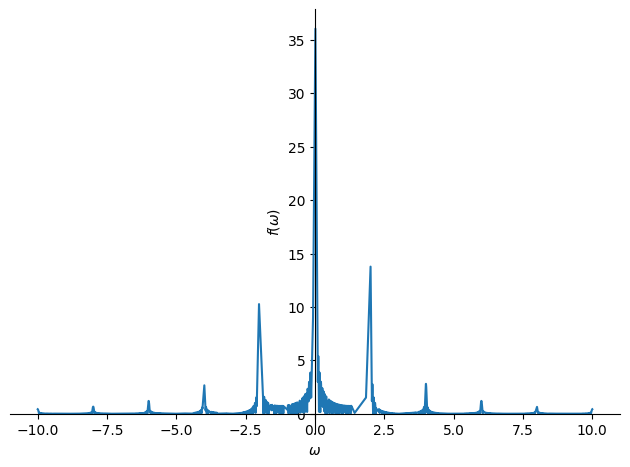

In [119]:
plot(Abs(F.subs(para_for_F)))